In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('merged_data.csv', sep=',')
df.head()

,Year,Country,Region,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual
0,2023,Finland,Western Europe,1,7.804,0.535,1.888,0.772,0.126,0.535,1.585,2.363
1,2023,Denmark,Western Europe,2,7.586,0.525,1.949,0.734,0.208,0.537,1.548,2.084
2,2023,Iceland,Western Europe,3,7.530,0.187,1.926,0.738,0.250,0.559,1.620,2.250
3,2023,Israel,Middle East and Northern Africa,4,7.473,0.158,1.833,0.569,0.124,0.577,1.521,2.691
4,2023,Netherlands,Western Europe,5,7.403,0.394,1.942,0.672,0.251,0.545,1.488,2.110


In [3]:
df.isnull().sum()

Year                            0
Country                         0
Region                         67
Happiness_Rank                  0
Happiness                       1
Explained_by_Trust              2
Explained_by_GDP                1
Explained_by_Freedom            1
Explained_by_Generosity         1
Explained_by_Health             2
Explained_by_Social_support     1
Dystopia_Residual               3
dtype: int64

In [4]:
nullwerte = df['Explained_by_Trust'].isnull() == True
df.loc[nullwerte,:]

,Year,Country,Region,Happiness_Rank,Happiness,Explained_by_Trust,Explained_by_GDP,Explained_by_Freedom,Explained_by_Generosity,Explained_by_Health,Explained_by_Social_support,Dystopia_Residual
283,2022,xx,NaN,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,2018,United Arab Emirates,Middle East and Northern Africa,20,6.774,NaN,2.096,0.284,0.186,0.67,0.776,NaN


In [5]:
df.columns

Index(['Year', 'Country', 'Region', 'Happiness_Rank', 'Happiness',
       'Explained_by_Trust', 'Explained_by_GDP', 'Explained_by_Freedom',
       'Explained_by_Generosity', 'Explained_by_Health',
       'Explained_by_Social_support', 'Dystopia_Residual'],
      dtype='object')

In [6]:
df_plot = df[['Happiness','Explained_by_Trust', 'Explained_by_GDP', 'Explained_by_Freedom',
       'Explained_by_Generosity', 'Explained_by_Health',
       'Explained_by_Social_support']]

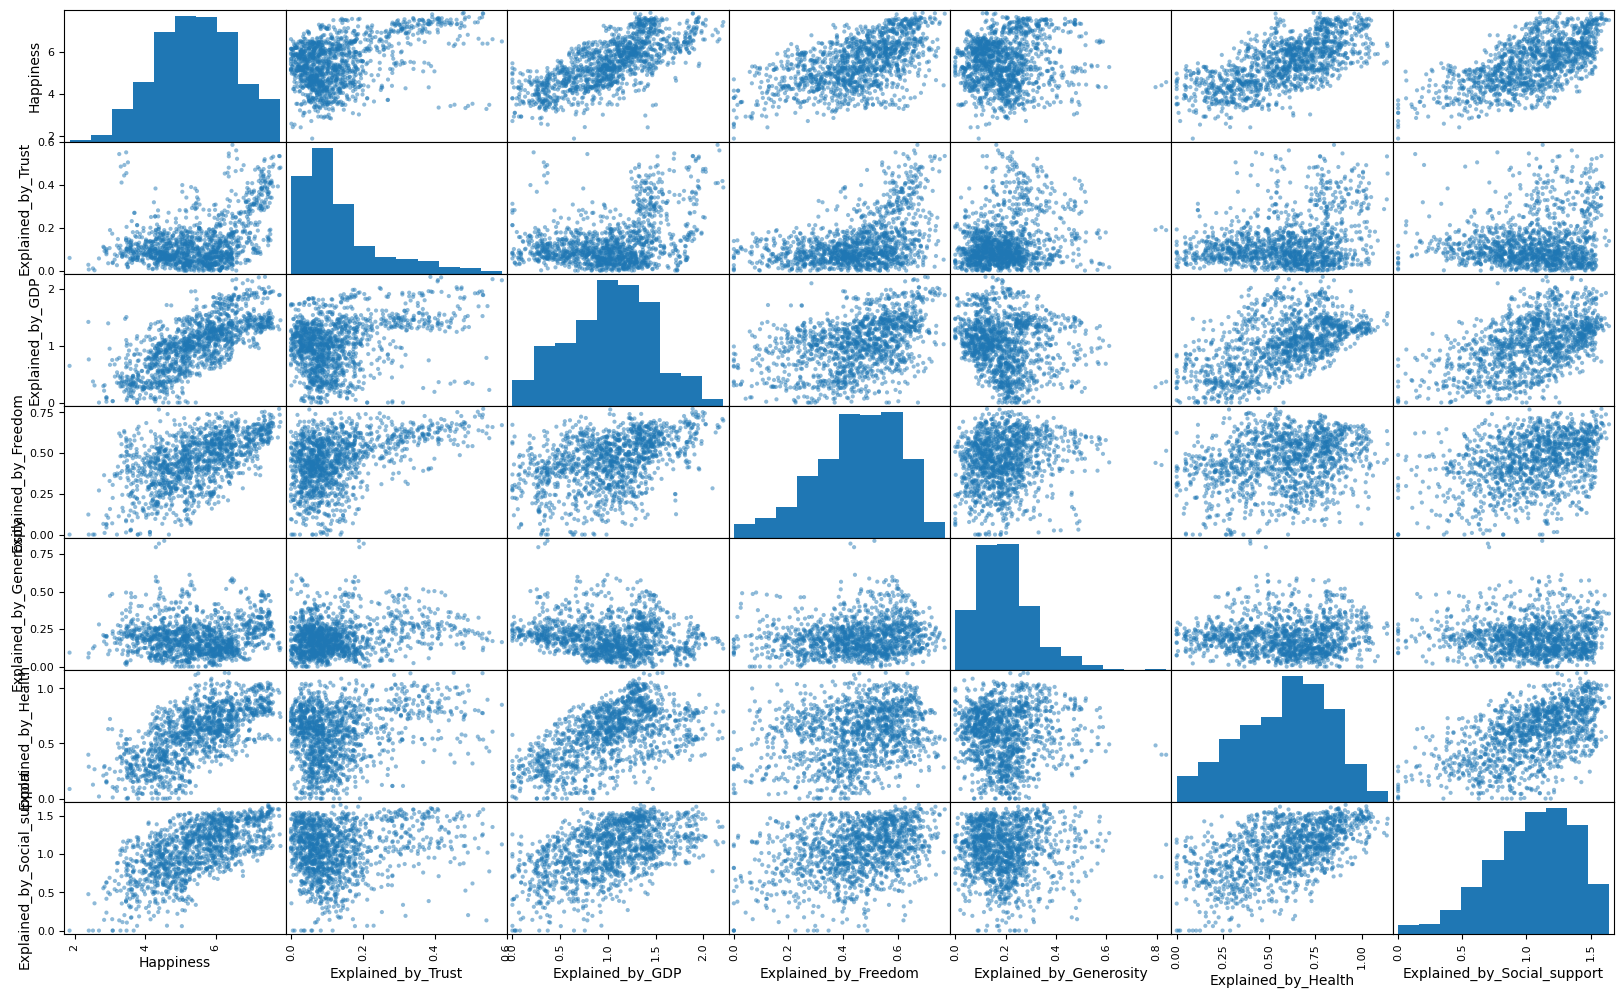

In [7]:
pd.plotting.scatter_matrix(df_plot, figsize=[20,12]);

In [8]:
import statsmodels.formula.api as smf

In [9]:
model = smf.ols(formula='Happiness ~ Explained_by_GDP', data=df_plot)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     1502.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          3.18e-222
Time:                        00:01:36   Log-Likelihood:                -1584.3
No. Observations:                1367   AIC:                             3173.
Df Residuals:                    1365   BIC:                             3183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.6230      0.051     70.564      0.000       3.522       3.724
Explained_by_GDP     1.7834      0.046     38.756      0.000       1.693       1.874
==============================================================================
Omnibus:                       23.954   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.047
Skew:                          -0.254   Prob(JB):                     8.12e-07
Kurtosis:                       3.485   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
intercept = results.params['Intercept']
slope = results.params['Explained_by_GDP']

x = pd.Series(np.linspace(0,2.3,100), index=np.linspace(0,2.3,100))

Y_hat = intercept + (slope*x)

print(Y_hat)

0.000000    3.623001
0.023232    3.664435
0.046465    3.705868
0.069697    3.747302
0.092929    3.788736
              ...   
2.207071    7.559194
2.230303    7.600627
2.253535    7.642061
2.276768    7.683495
2.300000    7.724928
Length: 100, dtype: float64


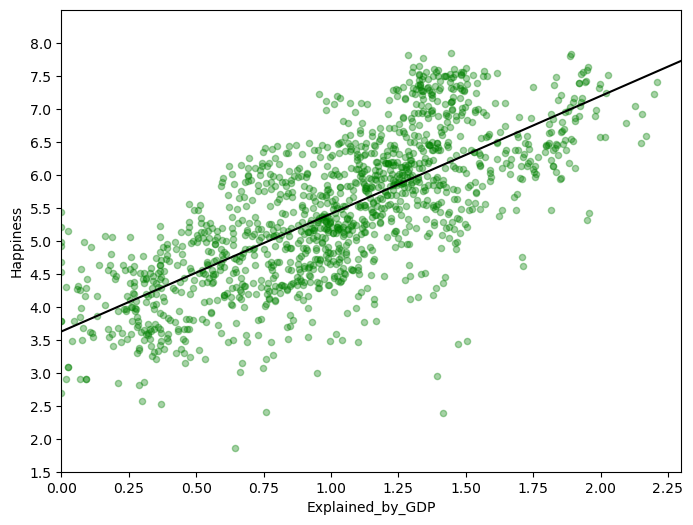

In [11]:
fig, ax = plt.subplots(figsize=[8,6])

df_plot.plot(kind='scatter',
             x='Explained_by_GDP',
             y='Happiness',
             alpha=0.35,
             ax=ax,
             ylim=[1.5,8.5],
             yticks=np.arange(1.5,8.5,step=0.5),
             xlim=[0,2.3],
             xticks=np.arange(0,2.5,step=0.25),
             color='green')
Y_hat.plot(ax=ax,
           color='black')

plt.show()

In [12]:
model_health = smf.ols(formula='Happiness ~ Explained_by_Health', data=df_plot)
results_health = model_health.fit()
results_health.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     1189.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          7.35e-188
Time:                        00:01:37   Log-Likelihood:                -1662.3
No. Observations:                1366   AIC:                             3329.
Df Residuals:                    1364   BIC:                             3339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.6233      0.057     63.358      0.000       3.511       3.735
Explained_by_Health     3.1131      0.090     34.478      0.000       2.936       3.290
==============================================================================
Omnibus:                        7.109   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.976
Skew:                          -0.085   Prob(JB):                       0.0504
Kurtosis:                       2.725   Cond. No.                         5.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model_social = smf.ols(formula='Happiness ~ Explained_by_Social_support', data=df_plot)
results_social = model_social.fit()
results_social.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     988.9
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          1.02e-163
Time:                        00:01:37   Log-Likelihood:                -1719.1
No. Observations:                1367   AIC:                             3442.
Df Residuals:                    1365   BIC:                             3453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1539      0.076     41.340      0.000       3.004       3.304
Explained_by_Social_support     2.1880      0.070     31.446      0.000       2.051       2.324
==============================================================================
Omnibus:                       12.774   Durbin-Watson:                   0.495
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.715
Skew:                          -0.038   Prob(JB):                       0.0128
Kurtosis:                       2.616   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model_trust = smf.ols(formula='Happiness ~ Explained_by_Trust', data=df_plot)
results_trust = model_trust.fit()
results_trust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     283.9
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           5.13e-58
Time:                        00:01:37   Log-Likelihood:                -1960.7
No. Observations:                1366   AIC:                             3925.
Df Residuals:                    1364   BIC:                             3936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8949      0.042    115.226      0.000       4.812       4.978
Explained_by_Trust     4.1219      0.245     16.850      0.000       3.642       4.602
==============================================================================
Omnibus:                       57.076   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.730
Skew:                          -0.528   Prob(JB):                     1.45e-14
Kurtosis:                       2.948   Cond. No.                         9.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model_multi = smf.ols(formula='Happiness ~ Explained_by_GDP + Explained_by_Health + Explained_by_Social_support + Explained_by_Trust', data=df_plot)
results_multi = model_multi.fit()
results_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     814.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:01:37   Log-Likelihood:                -1254.5
No. Observations:                1365   AIC:                             2519.
Df Residuals:                    1360   BIC:                             2545.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.5778      0.057     45.362      0.000       2.466       2.689
Explained_by_GDP                0.8885      0.048     18.599      0.000       0.795       0.982
Explained_by_Health             1.2560      0.088     14.215      0.000       1.083       1.429
Explained_by_Social_support     0.9432      0.063     14.928      0.000       0.819       1.067
Explained_by_Trust              1.8007      0.156     11.521      0.000       1.494       2.107
==============================================================================
Omnibus:                       24.445   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.821
Skew:                          -0.302   Prob(JB):                     2.47e-06
Kurtosis:                       3.297   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
results_multi.params

Intercept                      2.577821
Explained_by_GDP               0.888467
Explained_by_Health            1.256018
Explained_by_Social_support    0.943216
Explained_by_Trust             1.800670
dtype: float64

<Axes: >

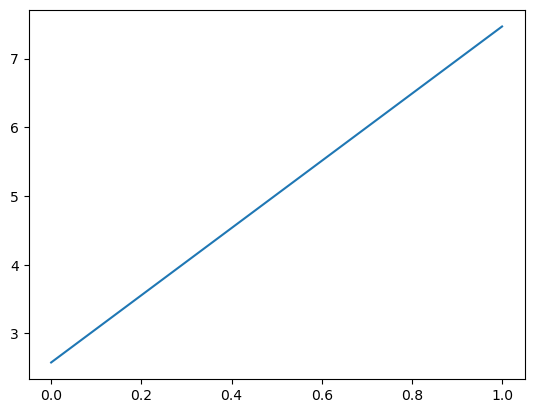

In [43]:
intercept = results_multi.params['Intercept']
slope_GDP = results_multi.params['Explained_by_GDP']
slope_Health = results_multi.params['Explained_by_Health']
slope_Social_support = results_multi.params['Explained_by_Social_support']
slope_Trust = results_multi.params['Explained_by_Trust']

x_gdp = pd.Series(np.linspace(0,1,1368), index=np.linspace(0,1,1368))
x_health = pd.Series(np.linspace(0,1.42,1400), index=np.linspace(0,1.42,1400))
x_social = pd.Series(np.linspace(0,1.65,1400), index=np.linspace(0,1.65,1400))
x_trust = pd.Series(np.linspace(0,0.59,1400), index=np.linspace(0,0.59,1400))

Y_hat_multi = intercept + (slope_GDP*x_gdp) + (slope_Health*x_gdp) + (slope_Social_support*x_gdp) + (slope_Trust*x_gdp)

Y_hat_multi.plot()

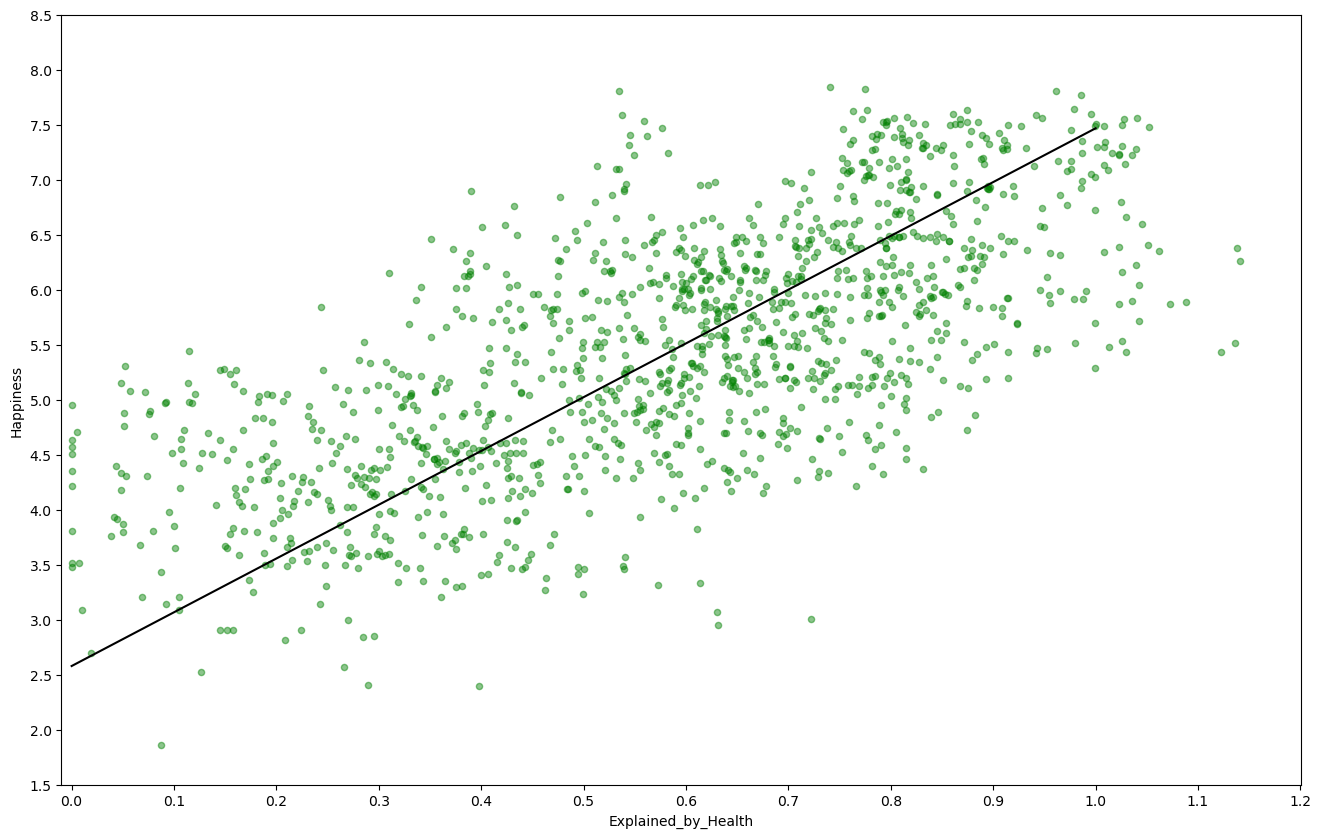

In [70]:
fig, ax = plt.subplots(figsize=[16,10])

df_plot.plot(kind='scatter',
             x='Explained_by_Health',
             y='Happiness',
             alpha=0.45,
             ax=ax,
             ylim=[1.5,8.5],
             yticks=np.arange(1.5,8.6,step=0.5),
             xlim=[-0.01,1.201],
             xticks=np.arange(0,1.201,step=0.1),
             color='green')
Y_hat_multi.plot(ax=ax,
            color='black')

plt.show()